# Introduction

This task involves predicting whether a customer will accept a personal loan offer based on their demographic and financial information.
Using the Bank Marketing Dataset, we will explore the data, preprocess it, train classification models, and analyze the results.

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load Dataset

In [2]:
df = pd.read_csv("Bank Marketing.csv", sep = ';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# Dataset Overview

In [3]:
print("Shape:", df.shape)
df.columns = df.columns.str.replace('"', '').str.strip()
print("\nColumns:\n", df.columns.tolist())

Shape: (41188, 21)

Columns:
 ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']


# Data Preprocessing


Missing values:
 age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


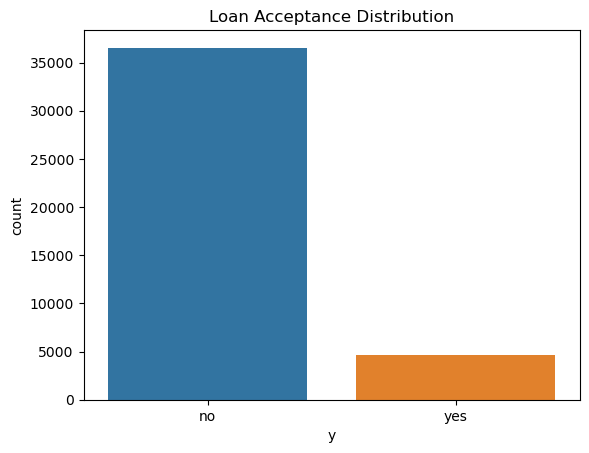

In [4]:
# Check for missing values
print("\nMissing values:\n", df.isnull().sum())

# Check target class distribution
sns.countplot(data=df, x='y')
plt.title('Loan Acceptance Distribution')
plt.show()

# Drop 'duration' (leakage variable)
if 'duration' in df.columns:
    df.drop('duration', axis=1, inplace=True)

# Feature Encoding

### Binary encode target variable

In [5]:
df['y'] = df['y'].map({'yes': 1, 'no': 0})

### Identify categorical and numerical features

In [6]:
categorical_cols = df.select_dtypes(include='object').columns.tolist()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).drop('y', axis=1).columns.tolist()

### Create preprocessing pipeline

In [7]:
preprocessor = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), categorical_cols)
], remainder='passthrough')

# Train-Test Split

In [8]:
X = df.drop('y', axis=1)
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training

In [9]:
# Logistic Regression Pipeline
lr_pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('scaling', StandardScaler(with_mean=False)),
    ('model', LogisticRegression(max_iter=1000))
])

# Decision Tree Pipeline
dt_pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('model', DecisionTreeClassifier())
])

# Fit models
lr_pipeline.fit(X_train, y_train)
dt_pipeline.fit(X_train, y_train)

# Predictions
lr_preds = lr_pipeline.predict(X_test)
dt_preds = dt_pipeline.predict(X_test)

# Evaluation

## Logistic Regression

In [10]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, lr_preds))
print("Classification Report:\n", classification_report(y_test, lr_preds))

Logistic Regression Accuracy: 0.8971837824714737
Confusion Matrix:
 [[7193  110]
 [ 737  198]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94      7303
           1       0.64      0.21      0.32       935

    accuracy                           0.90      8238
   macro avg       0.77      0.60      0.63      8238
weighted avg       0.88      0.90      0.87      8238



## Decision Tree

In [11]:
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, dt_preds))
print("Classification Report:\n", classification_report(y_test, dt_preds))

Decision Tree Accuracy: 0.8369749939305656
Confusion Matrix:
 [[6585  718]
 [ 625  310]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.90      0.91      7303
           1       0.30      0.33      0.32       935

    accuracy                           0.84      8238
   macro avg       0.61      0.62      0.61      8238
weighted avg       0.84      0.84      0.84      8238



# Conclusion

- Logistic Regression achieved an accuracy of 89.7%, while Decision Tree achieved 83.9%.
- The dataset was imbalanced, with fewer customers accepting the loan offer.
- Features like job, marital status, and contact type appeared influential.
- Removing 'duration' helped avoid data leakage.

This task reinforced skills in encoding mixed features and modeling customer behavior for marketing insights.